In [1]:
import numpy as np
from nilearn import datasets

yeo = datasets.fetch_atlas_yeo_2011()
print('Yeo atlas nifti image (3D) with 17 parcels and liberal mask is located '
      'at: %s' % yeo['thick_17'])

/home/user/.local/lib/python3.9/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "



Dataset created in /home/user/nilearn_data/yeo_2011



Downloaded 1769472 of ? bytes.

Yeo atlas nifti image (3D) with 17 parcels and liberal mask is located at: /home/user/nilearn_data/yeo_2011/Yeo_JNeurophysiol11_MNI152/Yeo2011_17Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz


 ...done. (7 seconds, 0 min)
Extracting data from /home/user/nilearn_data/yeo_2011/d7a5390bfb7686fb41fa64cc2ba058d0/Yeo_JNeurophysiol11_MNI152.zip..... done.


In [2]:
data = datasets.fetch_development_fmri(n_subjects=10)

print('Functional nifti images (4D, e.g., one subject) are located at : %r'
      % data['func'][0])
print('Counfound csv files (of same subject) are located at : %r'
      % data['confounds'][0])


Dataset created in /home/user/nilearn_data/development_fmri


Dataset created in /home/user/nilearn_data/development_fmri/development_fmri



 ...done. (2 seconds, 0 min)


 ...done. (4 seconds, 0 min)


Downloaded 5144576 of 5642698 bytes (91.2%,    0.7s remaining) ...done. (11 seconds, 0 min)


 ...done. (14 seconds, 0 min)


Downloaded 4489216 of 4946416 bytes (90.8%,    0.6s remaining) ...done. (10 seconds, 0 min)


 ...done. (3 seconds, 0 min)


Downloaded 5709824 of 6293165 bytes (90.7%,    0.8s remaining) ...done. (12 seconds, 0 min)


 ...done. (4 seconds, 0 min)


Downloaded 5898240 of 6136523 bytes (96.1%,    0.4s remaining) ...done. (13 seconds, 0 min)


 ...done. (4 seconds, 0 min)


Downloaded 5767168 of 5837641 bytes (98.8%,    0.1s remaining) ...done. (12 seconds, 0 min)


 ...done. (3 seconds, 0 min)


Downloaded 5570560 of 6118892 bytes (91.0%,    0.8s remaining) ...done. (13 seconds, 0 min)


 ...done. (3 seconds, 0 min)


Downloaded 6340608 of 6453693 bytes (98.2%,    0.2s remaining) ...done. (13 seconds, 0 min)


 ...done. (4 seconds, 0 min)


Downloaded 5799936 of 6176491 bytes (93.9%,    0.5s remaining) ...done. (13 seconds, 0 min)


 ...done. (4 seconds, 0 min)


Downloaded 5627904 of 6225801 bytes (90.4%,    0.9s remaining) ...done. (13 seconds, 0 min)


 ...done. (3 seconds, 0 min)


Downloaded 5324800 of 6232787 bytes (85.4%,    1.4s remaining)

Functional nifti images (4D, e.g., one subject) are located at : '/home/user/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
Counfound csv files (of same subject) are located at : '/home/user/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_desc-reducedConfounds_regressors.tsv'


 ...done. (12 seconds, 0 min)


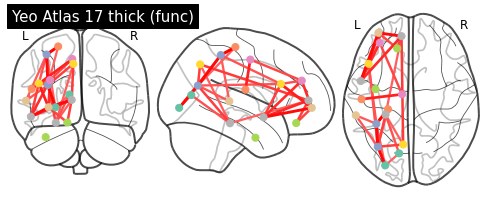

In [3]:
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure

# ConenctivityMeasure from Nilearn uses simple 'correlation' to compute
# connectivity matrices for all subjects in a list
connectome_measure = ConnectivityMeasure(kind='correlation')

# useful for plotting connectivity interactions on glass brain
from nilearn import plotting

# create masker to extract functional data within atlas parcels
masker = NiftiLabelsMasker(labels_img=yeo['thick_17'], standardize=True,
                           memory='nilearn_cache')

# extract time series from all subjects and concatenate them
time_series = []
for func, confounds in zip(data.func, data.confounds):
    time_series.append(masker.fit_transform(func, confounds=confounds))

# calculate correlation matrices across subjects and display
correlation_matrices = connectome_measure.fit_transform(time_series)

# Mean correlation matrix across 10 subjects can be grabbed like this,
# using connectome measure object
mean_correlation_matrix = connectome_measure.mean_

# grab center coordinates for atlas labels
coordinates = plotting.find_parcellation_cut_coords(labels_img=yeo['thick_17'])

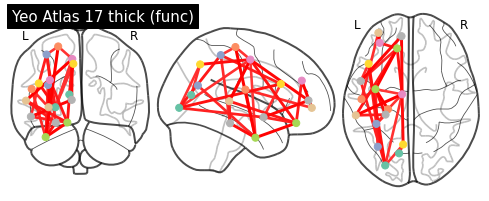

In [28]:
import matplotlib.pyplot as plt

# print(mean_correlation_matrix)

# print(coordinates)


# print(matrix)


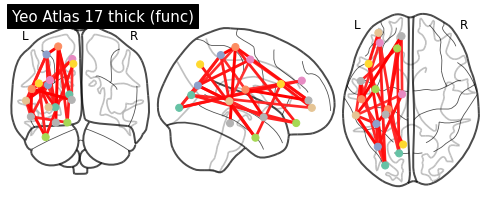

In [25]:
import numpy as np

# plot connectome with 80% edge strength in the connectivity
plotting.plot_connectome(mean_correlation_matrix, coordinates,
                         edge_threshold="80%",
                         title='Yeo Atlas 17 thick (func)')

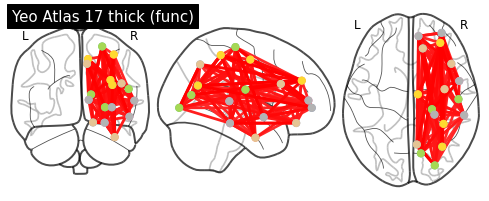

In [80]:
# print(-coordinates)
a = 17

val = 5
diff = np.random.random((17*2, 3))*val - 2*val
coords_l = coordinates
coords_r = coords_l
coords_r[:, 0] = -coords_r[:, 0]
coords = np.append(coords_r, coords_l, axis=0)
matrix = np.around(np.random.random((17*2, 17*2))*0.7, decimals=8)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        if i == j:
            matrix[i, j] = 1
        elif j > i:
            matrix[i, j] = matrix[j, i]
plotting.plot_connectome(matrix, coords,
                         edge_threshold="80%",
                         title='Yeo Atlas 17 thick (func)')
